In [2]:
import numpy as np

In [3]:
data_ibl = np.genfromtxt('20240204_1426.txt', skip_header=0, usecols=(1,3,4,5))
time_ibl = data_ibl[:, 0]
omegaX_ibl = data_ibl[:, 1]
omegaY_ibl = data_ibl[:, 2]
omegaZ_ibl = data_ibl[:, 3]

In [11]:
data_1 = np.genfromtxt('05022024_1.txt', skip_header=0, max_rows=None)
time_1 = data_1[:, 0]
fi_1 = data_1[:, 1]
theta_1 = data_1[:, 2]
omega_1 = theta_1*3600

In [12]:
import matplotlib.pyplot as plt

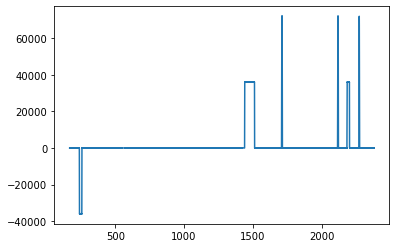

In [13]:
plt.plot(time_ibl, omegaY_ibl)

In [14]:
print(data_ibl.shape, data_1.shape, time_1[-1])

(442507, 4) (810453, 3) 89188.32067


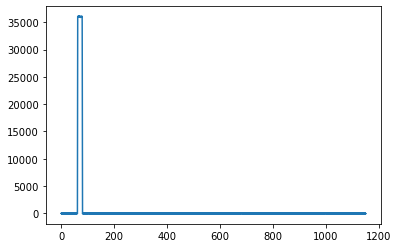

In [334]:
plt.plot(time_1[:int(round(time_ibl.size*0.05))], omega_1[:int(round(time_ibl.size*0.05))])

In [357]:
data1 = np.stack((time_1, omega_1), axis=1)
dataibl = np.stack((time_ibl, omegaY_ibl), axis=1)
dataibl[:,1] *= (-1)
print(data1.shape, dataibl.shape)

(810453, 2) (209156, 2)


In [336]:
data_ibl.shape[0]

209156

In [337]:
same_time = []

In [338]:
for i in range(data1.shape[0]):
    if ((data1[i][1] > 30000) and (data1[i][1] < 35000)):
        for j in range(dataibl.shape[0]):
            if abs(data1[i][1] + dataibl[j][1])<50:
                same_time.append((i,j))
                print(i, j)
                print(data1[i][1], dataibl[j][1])
same_time = np.array(same_time)

In [339]:
same_time

array([], dtype=float64)

In [340]:
def count_until_threshold(arr, start_index, threshold):
    count = 0
    for value in arr[start_index:]:
        if value >= threshold:
            count += 1
        else:
            break
    return count

In [341]:
beg1 = same_time[0][0]
begi = same_time[0][1]
begi

IndexError: index 0 is out of bounds for axis 0 with size 0

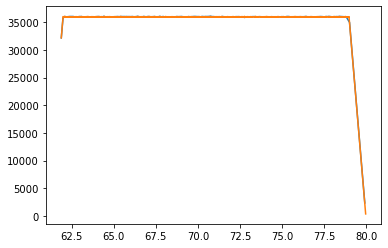

In [342]:
size1 = count_until_threshold(data1[:,1], beg1, 200)
data1_plot = data1[beg1:(beg1+size), :]
plt.plot(data1_plot[:,0], data1_plot[:,1])
sizei = count_until_threshold(dataibl[:,1], begi, 200)
datai_plot = dataibl[begi:(begi+sizei), :]
datai_plot[:, 0] -= (dataibl[:,0][begi] - data1[:,0][beg1])
plt.plot(datai_plot[:,0], datai_plot[:,1])
#plt.plot([79.8255864, 79.8255864], [0,36100])

In [76]:
print(data1_plot[:10, :], datai_plot[:10, :])

[[   61.8797298 32179.248    ]
 [   61.981458  35762.4      ]
 [   62.0812155 36048.24     ]
 [   62.1809488 35979.984    ]
 [   62.2856462 36016.776    ]
 [   62.3843824 36044.1      ]
 [   62.584571  36045.576    ]
 [   62.6859431 35984.412    ]
 [   62.7876667 35966.484    ]
 [   62.8879674 36002.772    ]] [[   61.8797298  32181.34205231]
 [   61.8847298  32392.23780409]
 [   61.8897298  32579.31875321]
 [   61.8947298  32788.26785159]
 [   61.8997298  32950.91610834]
 [   61.9047298  33097.6751663 ]
 [   61.9097298  33252.59677945]
 [   61.9147298  33492.46060973]
 [   61.9197298  33685.94957411]
 [   61.9247298  33855.28369319]]


In [343]:
def max_diff(data1, datai):
    max_difference = -np.inf
    best_key = None
    best_values = (None, None)
    best_indices = (None, None)

    for i, val1 in enumerate(data1):
        key1 = val1[0]

        for j, val2 in enumerate(datai):
            key2 = val2[0]

            if abs(key1 - key2) <= 0.005: 
                difference = abs(val1[1] - val2[1])
                if difference > max_difference:
                    max_difference = difference
                    best_key = key1 
                    best_values = (val1[1], val2[1])  
                    best_indices = (i, j)  

    print(f"Максимальная разница: {max_difference}, при времени: {best_key}")
    print(f"Величины: {best_values[0]} и {best_values[1]} на индексах: {best_indices[0]} и {best_indices[1]}")



In [344]:
def average_diff(data1, datai):
    total_difference = 0
    count = 0
    
    for i, val1 in enumerate(data1):
        key1 = val1[0]

        for j, val2 in enumerate(datai):
            key2 = val2[0]

            if abs(key1 - key2) <= 0.005: 
                difference = abs(val1[1] - val2[1])
                total_difference += difference
                count += 1
    if count > 0:
        average_difference = total_difference / count
        print(f"Средняя разница: {average_difference}")
    else:
        print("Нет совпадающих пар для вычисления средней разницы.")

In [345]:
max_diff(data1_plot, datai_plot)
average_diff(data1_plot, datai_plot)

Максимальная разница: 473.6534778999994, при времени: 79.8255864
Величины: 6009.084 и 5535.4305221 на индексах: 163 и 3590
Средняя разница: 41.44130994571438


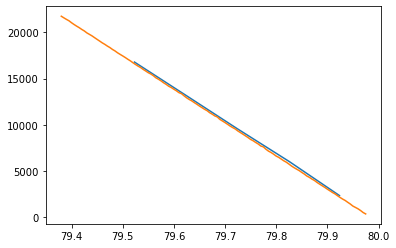

In [346]:
plt.plot(data1_plot[160:,0], data1_plot[160:,1])
plt.plot(datai_plot[3500:,0], datai_plot[3500:,1])

In [347]:
time1_ind = None
timeibl_ind = []

for i, row1 in enumerate(data1):
    time1, o1 = row1

    if o1 > 2000:
        for j, row2 in enumerate(dataibl):
            time2, o2 = row2
            
            if abs(o1 - o2) <= 500:
                time1_ind = i  
                timeibl_ind.append(j) 
        break 

# Вывод результатов
print(time1_ind, timeibl_ind)


556 [14077, 14078, 14079, 14080, 14081, 14082, 17844, 17845, 17846, 17847, 17848]


In [348]:
print(dataibl[14077][0])

238.71


In [358]:
def plot(beg1, begi, data_1, data_ibl):
    plt.figure()
    size1 = count_until_threshold(data_1[:,1], beg1, 2000)
    data1_plot = data_1[beg1:(beg1+size1), :]
    plt.plot(data1_plot[:,0], data1_plot[:,1])
    sizei = count_until_threshold(data_ibl[:,1], begi, 2000)
    datai_plot = data_ibl[begi:(begi+sizei), :]
    datai_plot[:, 0] -= (data_ibl[:,0][begi] - data_1[:,0][beg1])
    plt.plot(datai_plot[:,0], datai_plot[:,1])
    plt.show()

    average_diff(data1_plot, datai_plot)
    max_diff(data1_plot, datai_plot)

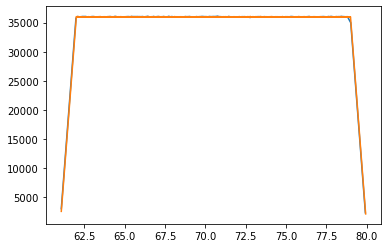

Средняя разница: 82.00385650889221
Максимальная разница: 701.5617065999977, при времени: 61.981458
Величины: 35762.399999999994 и 35060.8382934 на индексах: 8 и 181


In [359]:
plot(time1_ind, timeibl_ind[0], data1, dataibl)


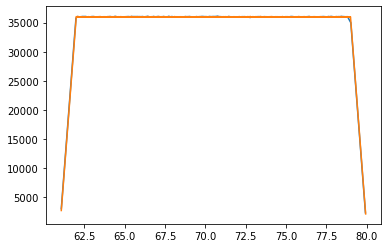

Средняя разница: 60.24993474906971
Максимальная разница: 509.3442432899974, при времени: 61.5765407
Величины: 21187.26 и 20677.91575671 на индексах: 4 и 100


In [360]:
plot(time1_ind, timeibl_ind[1], data1, dataibl)

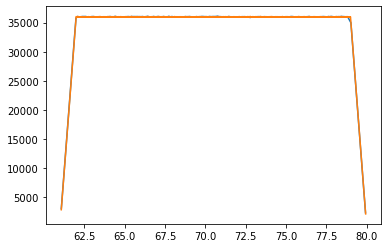

Средняя разница: 38.48045537200571
Максимальная разница: 324.56434781999997, при времени: 61.8797298
Величины: 32179.248 и 31854.68365218 на индексах: 7 и 161


In [361]:
plot(time1_ind, timeibl_ind[2], data1, dataibl)

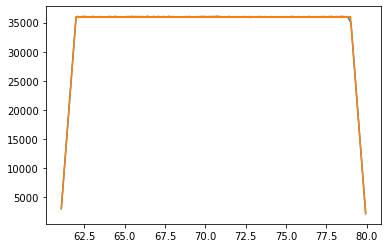

Средняя разница: 38.2980555290407
Максимальная разница: 296.76941307000016, при времени: 79.6224882
Величины: 13211.712 и 12914.94258693 на индексах: 168 и 3711


In [362]:
plot(time1_ind, timeibl_ind[3], data1, dataibl)

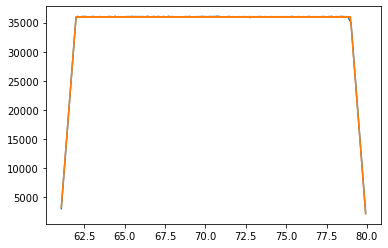

Средняя разница: 59.68672654242708
Максимальная разница: 476.44541905000005, при времени: 79.6224882
Величины: 13211.712 и 12735.26658095 на индексах: 168 и 3711


In [326]:
plot(time1_ind, timeibl_ind[4], data1, dataibl)

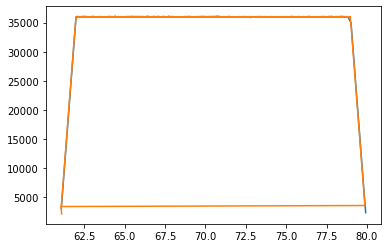

Средняя разница: 82.25539355648432
Максимальная разница: 653.7922850899995, при времени: 79.8255864
Величины: 6009.084 и 5355.29171491 на индексах: 170 и 3751


In [299]:
plot(time1_ind, timeibl_ind[5], data1, dataibl)

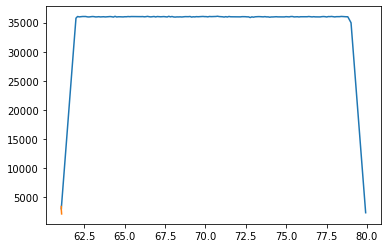

Средняя разница: 219.173848428
Максимальная разница: 368.83720073999984, при времени: 61.0718898
Величины: 3028.464 и 3397.30120074 на индексах: 0 и 0


In [300]:
plot(time1_ind, timeibl_ind[6], data1, dataibl)

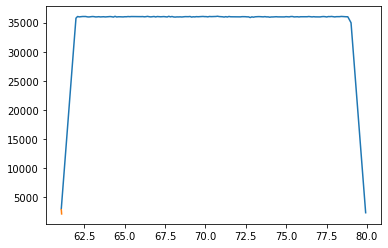

Средняя разница: 264.32189934999997
Максимальная разница: 355.20117244999983, при времени: 61.0718898
Величины: 3028.464 и 2673.26282755 на индексах: 0 и 1


In [293]:
plot(time1_ind, timeibl_ind[9], data1, dataibl)

In [366]:
same_time = (556, 14080)

In [367]:
import math

In [394]:
begin_koord = np.array([[1,0,0],[0,-1,0],[0,0,-1]])
M1 = np.array([])
ex = begin_koord[:, 0]
ey = begin_koord[:, 1]
ez = begin_koord[:, 2]
print(ex, ey, ez)
fi0 = None
fi = None
for i in range(566, 647):
    fi0 = fi_1[i-1]
    fi = fi_1[i]
    dfi_r = math.radians(fi-fi0)
    #print(fi-fi0)
    M1 = np.array([[np.cos(dfi_r), 0, np.sin(dfi_r)], [0, 1, 0], [-np.sin(dfi_r), 0, np.cos(dfi_r)]]) #пока что считаем что ось 1 сонаправлена с Y
    ex = M1 @ ex
    ey = M1 @ ey
    ez = M1 @ ez
print(fi_1[647] - fi_1[566])

[1 0 0] [ 0 -1  0] [ 0  0 -1]
89.75001


In [396]:
print(ex, ey, ez)  #ну вроде правильно

[ 0.00436505  0.         -0.99999047] [ 0. -1.  0.] [-0.99999047  0.         -0.00436505]
